#### To Predict the percentage of marks of an student based on the number of study hours

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data from remote link
url="http://bit.ly/w-data"
s_data=pd.read_csv(url)
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


####  Lets plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.we can create the plot with the following snipet

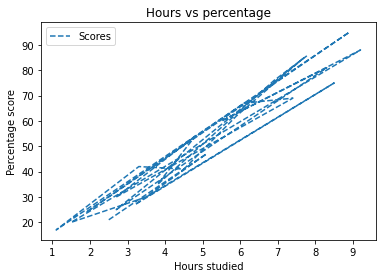

In [3]:
#plotting the distribution of scores

s_data.plot(x='Hours',y='Scores',style='--')
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

#### From the graph above,we can clearly see that there is a positive linear relation between the number of hours studied and the percentage of score.

### Preparing the data
 The step is to divide the data into "attributes"(inputs) and"labels"(outputs)

In [3]:
x=s_data.iloc[:, :-1].values
y=s_data.iloc[:, 1].values

Now that we have our attributes and lables,the next step is to split this data into training and test sets.we'll do this by using scikit-learns built-in train_test_split()method.

In [4]:
#data preparation
x=s_data[['Hours']].values
y=s_data[['Scores']].values

In [7]:
y,x

(array([[21],
        [47],
        [27],
        [75],
        [30],
        [20],
        [88],
        [60],
        [81],
        [25],
        [85],
        [62],
        [41],
        [42],
        [17],
        [95],
        [30],
        [24],
        [67],
        [69],
        [30],
        [54],
        [35],
        [76],
        [86]], dtype=int64),
 array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]))

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

### Training the Algorithm
 we have split our data into training and testing sets,and now is finally the time to train the algorithm

In [6]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('Training complete')

Training complete


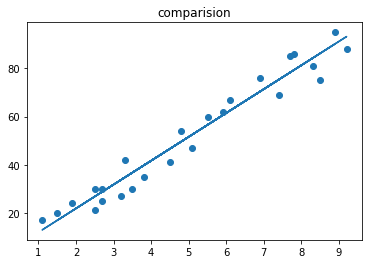

In [7]:
#Potting the regression line
line=regressor.coef_*x+regressor.intercept_ #y=mx+c(how far the data from the line)

#plotting for the test data
plt.scatter(x, y)
plt.plot(x,line);
plt.title('comparision')
plt.show()


### Making prediction
Now that we have trained our Algorithm,it's time to make some predictions

In [8]:
print(x_test)#Testing data -in hours
y_pred=regressor.predict(x_test)#predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
score_pred=np.array([9.15])
score_pred=score_pred.reshape(-1,1)
predict=regressor.predict(score_pred)
print("No of hours={}".format(9.25))
print("Predicted Score={}".format(predict[0]))

No of hours=9.25
Predicted Score=[92.70066684]


### Evaluating the model
The final step is to evaluate the performance of algorithm.This step is particualrly important to prepare how well differnt algorithms perform on a particular dataset.For simplicity here,we have chosen the mean square error.There are many metrices

In [18]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
